# Understanding The Data
- Handle Missing Data
- Categorical Encoding
- Feature Scaling
- Outlier Detection

### Handeling missing data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import f_oneway, chi2_contingency
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay,
    accuracy_score, precision_score, recall_score, f1_score
    
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


Filename="Student_performance_data .csv" #importing .csv file using pandas
df=pd.read_csv(Filename)

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [3]:
df.info() #Gathering info from .csv file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
df.isnull().sum() #check to see if any values are missing

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [5]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [6]:
df.drop(columns='StudentID')

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [7]:
output='GradeClass'
features=df.columns.drop([output,'StudentID']).tolist()
print(features)

['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']


### Scaling Data


In [8]:
#Categorical variables 
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
le = LabelEncoder()
for columns in categorical_cols:
    df[columns] = le.fit_transform(df[columns])

In [9]:
#Feature Scaling
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
scaler = MinMaxScaler()
df_minmax = df.copy()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Min-Max Scaled Data (First 5 rows):")
display(df_minmax[numerical_columns].head())
print("\nMin-Max Scaled Stats:")
display(df_minmax[numerical_columns].describe().T)

Min-Max Scaled Data (First 5 rows):


,Age,StudyTimeWeekly,Absences,GPA
0,17,19.833723,7,2.929196
1,18,15.408756,0,3.042915
2,15,4.210570,26,0.112602
3,17,10.028829,14,2.054218
4,17,4.672495,17,1.288061



Min-Max Scaled Stats:


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
GPA,2392.0,1.906186,0.915156,0.000000,1.174803,1.893393,2.622216,4.000000


### Outlier Detection

In [10]:
#outlier detection using IQR method
print("Initial number of rows: ", len(df))

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_rows = len(df)
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"\nRemoving outliers for {column}:")
    print(f"Q1: {Q1:.2f} \nQ3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Rows before: {initial_rows}, Rows after: {len(df_filtered)}")
    return df_filtered

initial_rows = len(df)
for col in numerical_columns:
    df = remove_outliers(df, col)
    if len(df) < 0.9 * initial_rows:
        print(f"Warning: Significant data loss after removing outliers for {col}.")

print('\nFinal number of rows after outlier removal:', len(df))
print("\nSummary of numerical columns after outlier removal:\n", df[numerical_columns].describe().T)

Initial number of rows:  2392

Removing outliers for Age:
Q1: 0.00 
Q3: 0.67
IQR: 0.67
Lower bound: -1.00
Upper bound: 1.67
Rows before: 2392, Rows after: 2392

Removing outliers for StudyTimeWeekly:
Q1: 0.25 
Q3: 0.72
IQR: 0.47
Lower bound: -0.45
Upper bound: 1.42
Rows before: 2392, Rows after: 2392

Removing outliers for Absences:
Q1: 0.24 
Q3: 0.76
IQR: 0.52
Lower bound: -0.53
Upper bound: 1.53
Rows before: 2392, Rows after: 2392

Removing outliers for GPA:
Q1: 0.29 
Q3: 0.66
IQR: 0.36
Lower bound: -0.25
Upper bound: 1.20
Rows before: 2392, Rows after: 2392

Final number of rows after outlier removal: 2392

Summary of numerical columns after outlier removal:
                   count      mean       std  min       25%       50%  \
Age              2392.0  0.489548  0.374599  0.0  0.000000  0.333333   
StudyTimeWeekly  2392.0  0.489108  0.282964  0.0  0.252391  0.485773   
Absences         2392.0  0.501427  0.291980  0.0  0.241379  0.517241   
GPA              2392.0  0.476547  0.2287

# Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- SMOTE Class Imbalance

### Univariate Analysis

c:\Users\kyles\anaconda3\envs\tf-env\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


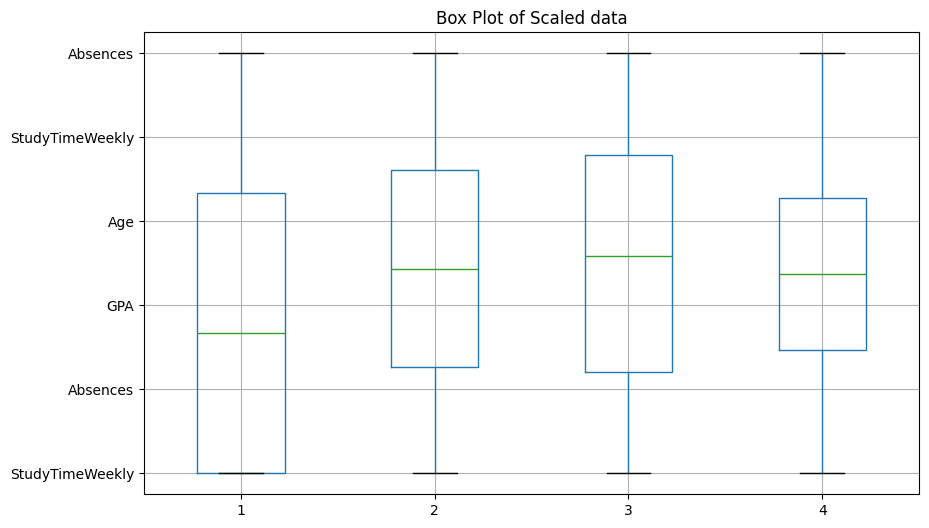

In [11]:

scaler = MinMaxScaler()  # or StandardScaler()
df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']] = scaler.fit_transform(df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']])
features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
fig, ax=plt.subplots(figsize=(10, 6))
boxplot=df[features].boxplot(vert=0,ax=ax)
_=ax.set_title(f'Box Plot of Scaled data')

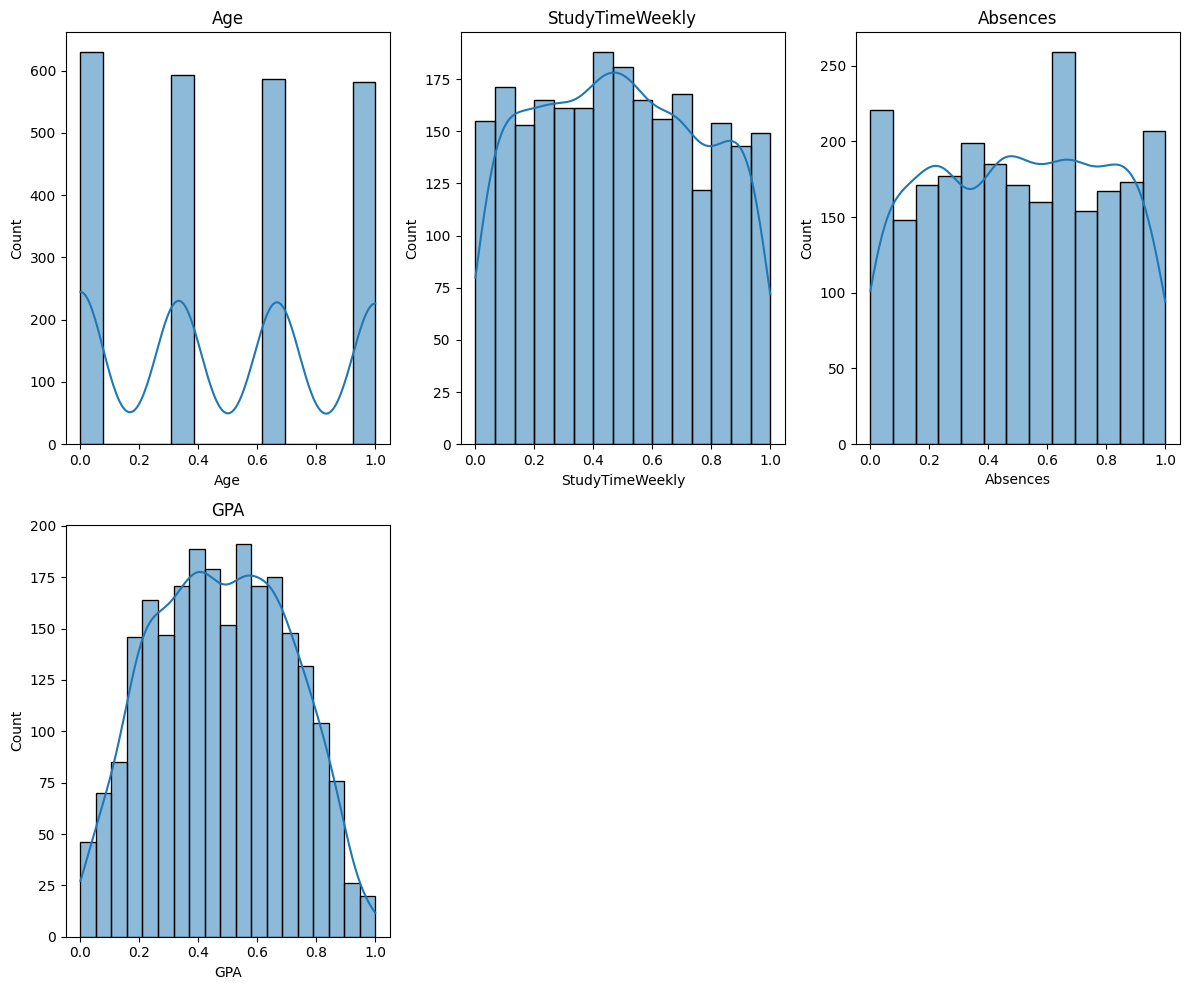

In [12]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(features):

    plt.subplot(math.ceil(len(features) / 3), 3, i + 1)

    sns.histplot(df[col], kde=True)

    plt.title(col)

plt.tight_layout()

plt.show()

### Bivariate Analysis

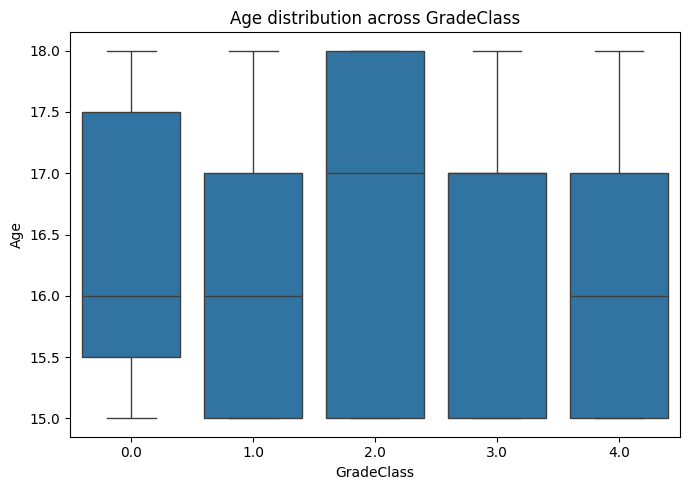

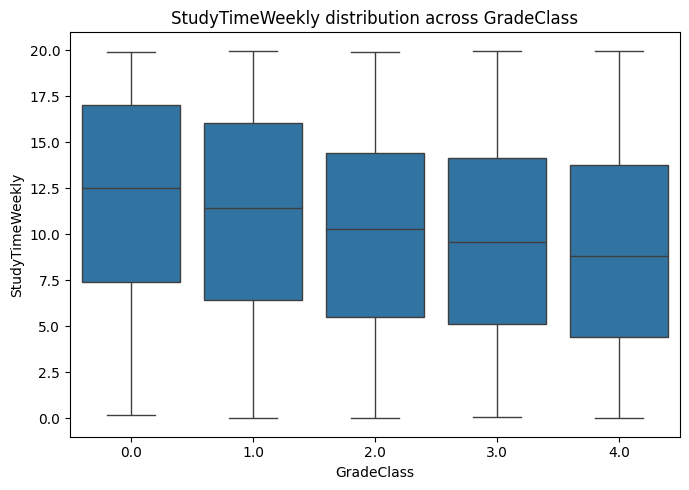

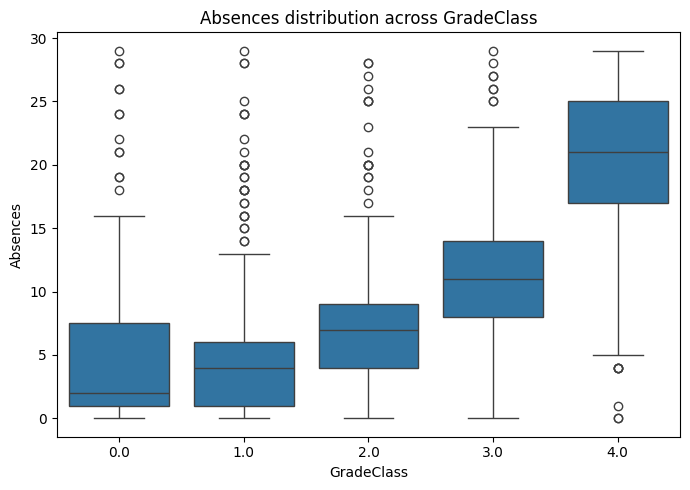

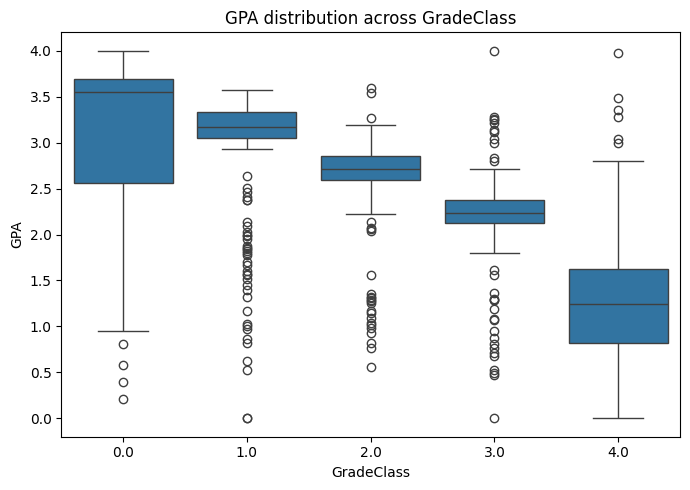

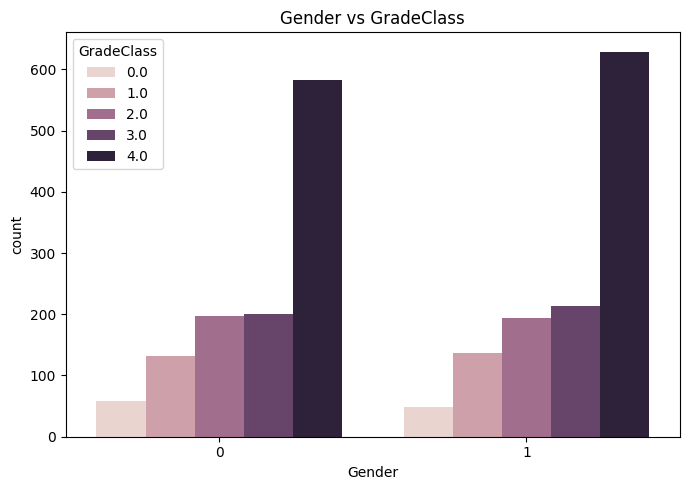

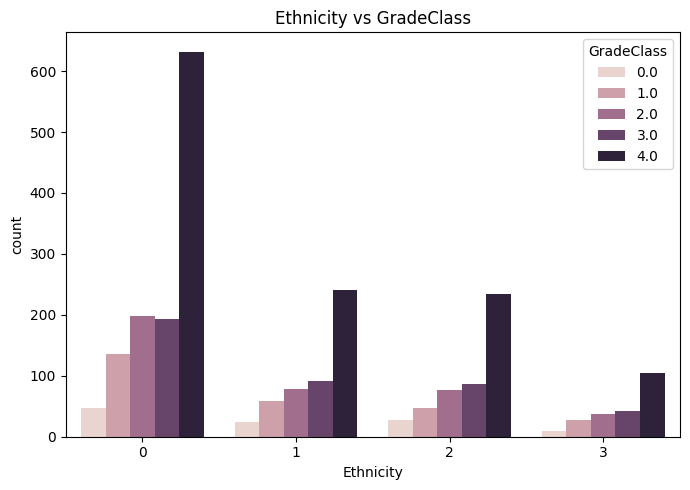

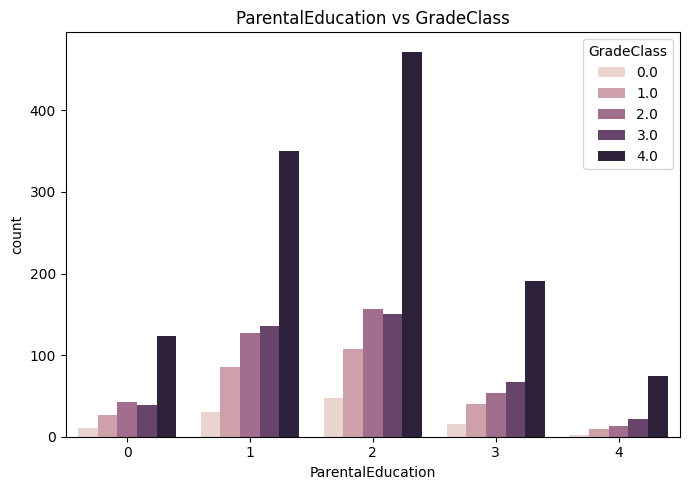

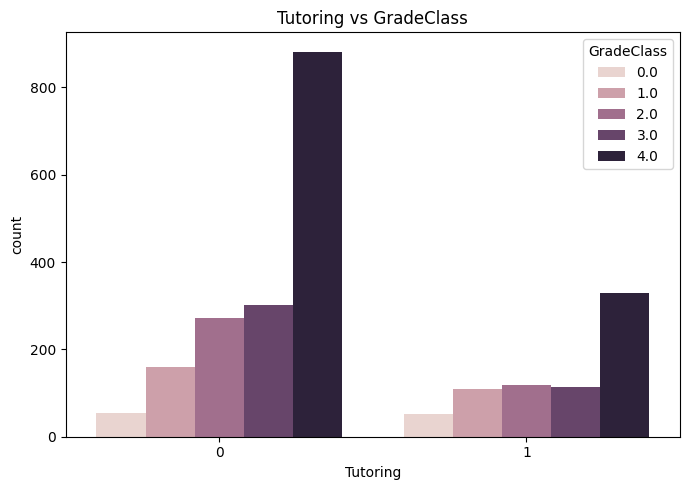

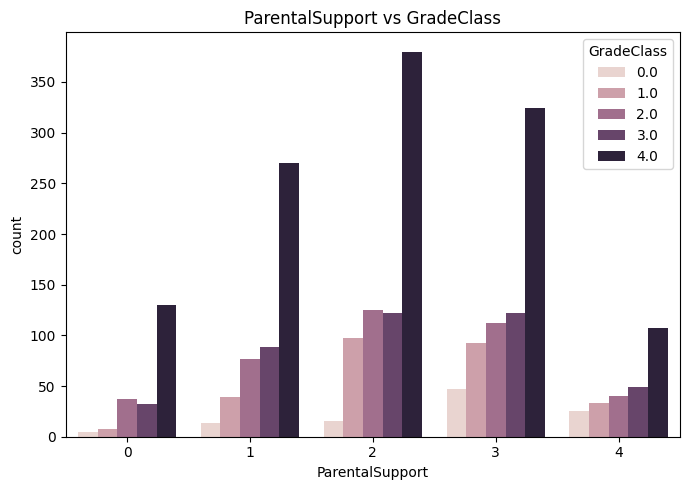

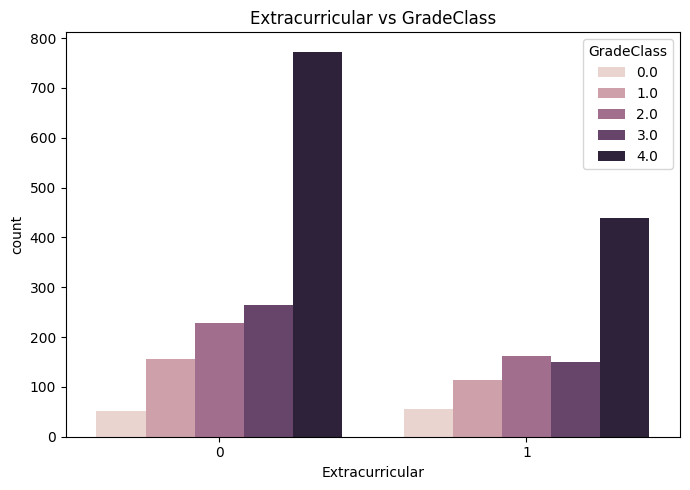

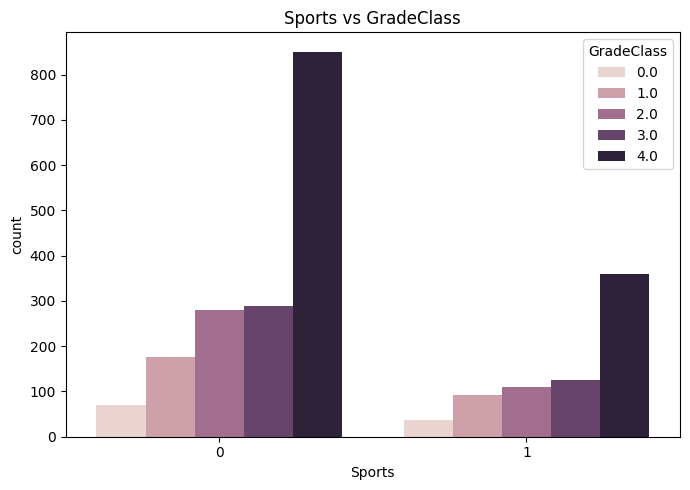

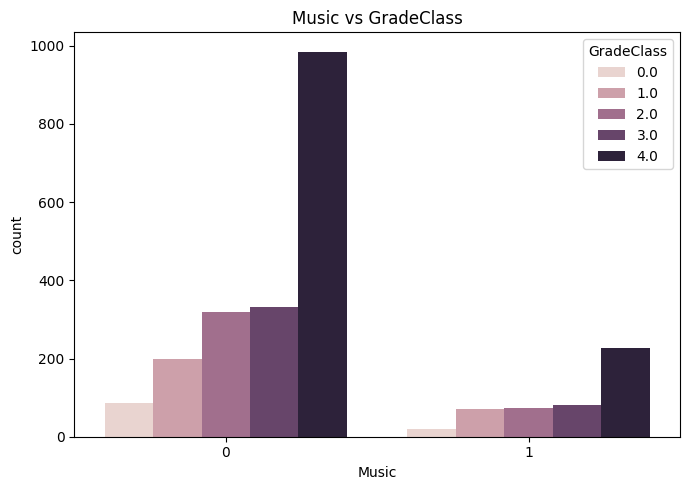

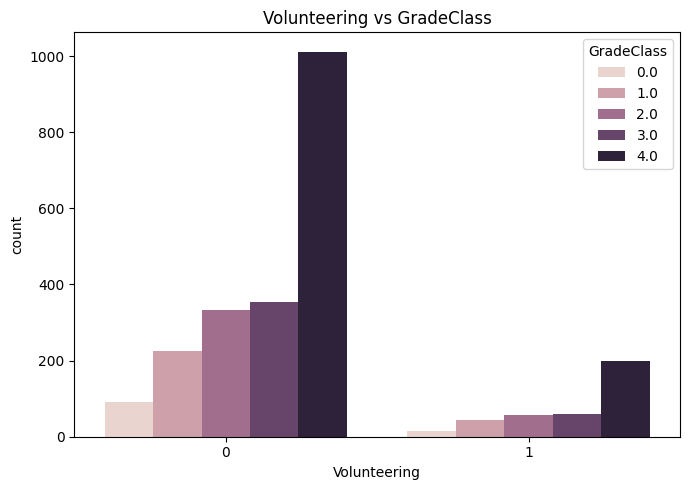

 Summary of Features Significantly Related to GradeClass:

          Feature        Type Significant
              Age   Numerical          No
  StudyTimeWeekly   Numerical         Yes
         Absences   Numerical         Yes
              GPA   Numerical         Yes
           Gender Categorical          No
        Ethnicity Categorical          No
ParentalEducation Categorical          No
         Tutoring Categorical         Yes
  ParentalSupport Categorical         Yes
  Extracurricular Categorical         Yes
           Sports Categorical          No
            Music Categorical          No
     Volunteering Categorical          No


In [13]:
df = pd.read_csv('Student_performance_data .csv')  

target = 'GradeClass'

# Define numerical and categorical features (excluding target)
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
                        'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# -------------------------------
# NUMERICAL → CATEGORICAL (Box Plots)
# -------------------------------
for feature in numerical_features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x=target, y=feature)
    plt.title(f'{feature} distribution across {target}')
    plt.tight_layout()
    plt.show()

# -------------------------------
# CATEGORICAL → CATEGORICAL (Count Plots + Chi-Square)
# -------------------------------
chi_square_results = {}

for feature in categorical_features:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=feature, hue=target)
    plt.title(f'{feature} vs {target}')
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()
    
    # Chi-square test
    contingency = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_square_results[feature] = p

# -------------------------------
# Show Chi-Square Test Results
# -------------------------------
summary = []

# Analyze numerical features
for feature in numerical_features:
    groups = [group[feature].dropna() for name, group in df.groupby(target)]
    _, p = f_oneway(*groups)
    significant = p < 0.05
    summary.append((feature, 'Numerical', "Yes" if significant else "No"))

# Analyze categorical features
for feature in categorical_features:
    contingency = pd.crosstab(df[feature], df[target])
    _, p, _, _ = chi2_contingency(contingency)
    significant = p < 0.05
    summary.append((feature, 'Categorical', "Yes" if significant else "No"))

# Create and display final summary
results_df = pd.DataFrame(summary, columns=['Feature', 'Type', 'Significant'])
print(" Summary of Features Significantly Related to GradeClass:\n")
print(results_df.to_string(index=False))


### SMOTE analysis

In [14]:
df = pd.read_csv("Student_performance_data .csv")


def assign_grade_class(gpa):
    if gpa >= 3.5:
        return 'A'
    elif gpa >= 3.0:
        return 'B'
    elif gpa >= 2.5:
        return 'C'
    elif gpa >= 2.0:
        return 'D'
    else:
        return 'F'


df['GradeLetter'] = df['GPA'].apply(assign_grade_class)


label_encoder = LabelEncoder()
df['GradeClassEncoded'] = label_encoder.fit_transform(df['GradeLetter'])


X = df.drop(['GradeLetter', 'GradeClassEncoded', 'StudentID', 'GPA'], axis=1)
y = df['GradeClassEncoded']


original_counts = dict(Counter(y))
print("Original class distribution:", {label_encoder.inverse_transform([k])[0]: v for k, v in original_counts.items()})


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled_letters = label_encoder.inverse_transform(y_resampled)


resampled_counts = dict(Counter(y_resampled))
print("After SMOTE class distribution:", {label_encoder.inverse_transform([k])[0]: v for k, v in resampled_counts.items()})


Original class distribution: {'C': 385, 'B': 244, 'F': 1274, 'D': 412, 'A': 77}
After SMOTE class distribution: {'C': 1274, 'B': 1274, 'F': 1274, 'D': 1274, 'A': 1274}


# Outlier Treatment

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["ParentalEducation"].quantile(0.25)
Q3 = df["ParentalEducation"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df["ParentalEducation"] >= lower_bound) & (df["ParentalEducation"] <= upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
 15  GradeLetter        2392 non-null   object 
 16  GradeClassEncoded  2392 

# Model Building

- Spliting the data
- Logistic Reggression
- Random Forest
- XGBoost 

### Logistic Regression

ROC Curve skipped (only applicable for binary classification).


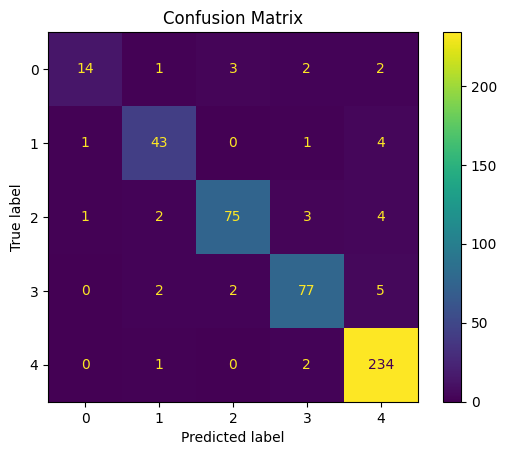

Train Accuracy: 93.10%
Test Accuracy: 92.48%


In [16]:
x = df.drop(['GradeClass','StudentID'], axis=1)
y=df["GradeClass"]
x = pd.get_dummies(x)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

model = LogisticRegression(random_state = 0, solver='lbfgs',max_iter=1000)
model.fit(X_train, y_train)

y_train_pred_1 = model.predict(X_train)
y_test_pred_1 = model.predict(X_test) 

# ROC Curve (Only if binary classification)
if len(model.classes_) == 2:
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=model.classes_[1])
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.title("ROC Curve")
    plt.show()
else:
    print("ROC Curve skipped (only applicable for binary classification).")
    
cm = confusion_matrix(y_test, y_test_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred_1)
test_acc = accuracy_score(y_test, y_test_pred_1)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")






### Evaluation of Metrics-Logistic_Regression

- Accuracy Score
- Precision Score
- Recall Score
- F1-Score 



In [17]:

# Classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_1))


Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.88      0.88      0.88        49
         2.0       0.94      0.88      0.91        85
         3.0       0.91      0.90      0.90        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.91      0.86      0.88       479
weighted avg       0.92      0.92      0.92       479



### Random Forest

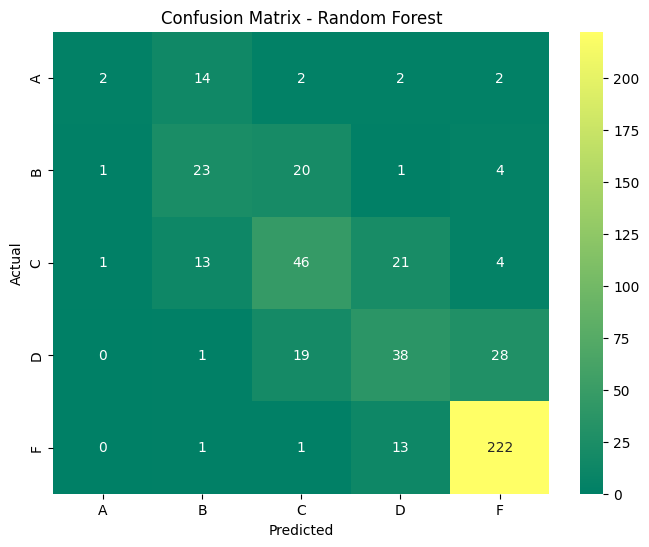

In [18]:
data = pd.read_csv('Student_performance_data .csv')
data['StudyEfficienty'] = data['StudyTimeWeekly'] / (data['Absences'] + 1)
data['ActivityScore'] = data[['Extracurricular', 'Sports', 'Music', 'Volunteering']].sum(axis=1)
data['ParentalInfluence'] = data['ParentalEducation'] * 0.4 + data['ParentalSupport'] * 0.6


#To define features (x) and target (y)
X = data.drop(['StudentID', 'GradeClass', 'GPA'], axis=1, errors='ignore')
y = data['GradeClass']

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=['A', 'B', 'C', 'D', 'F'], yticklabels=['A', 'B', 'C', 'D', 'F'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





### Evaluation of Metrics- RandomForest

- Accuracy Score
- Precision Score
- Recall Score
- F1-Score 


In [19]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['A', 'B', 'C', 'D', 'F']))

Random Forest Accuracy: 0.6910229645093946

Classification Report:
               precision    recall  f1-score   support

           A       0.50      0.09      0.15        22
           B       0.44      0.47      0.46        49
           C       0.52      0.54      0.53        85
           D       0.51      0.44      0.47        86
           F       0.85      0.94      0.89       237

    accuracy                           0.69       479
   macro avg       0.57      0.50      0.50       479
weighted avg       0.67      0.69      0.67       479




Feature Importance:
               Feature  Importance
5            Absences    0.303574
12    StudyEfficienty    0.230066
4     StudyTimeWeekly    0.114772
14  ParentalInfluence    0.060297
0                 Age    0.041684
7     ParentalSupport    0.040201
2           Ethnicity    0.037767
3   ParentalEducation    0.035697
13      ActivityScore    0.030686
1              Gender    0.022776
6            Tutoring    0.021650
8     Extracurricular    0.017929
9              Sports    0.017007
10              Music    0.013803
11       Volunteering    0.012091


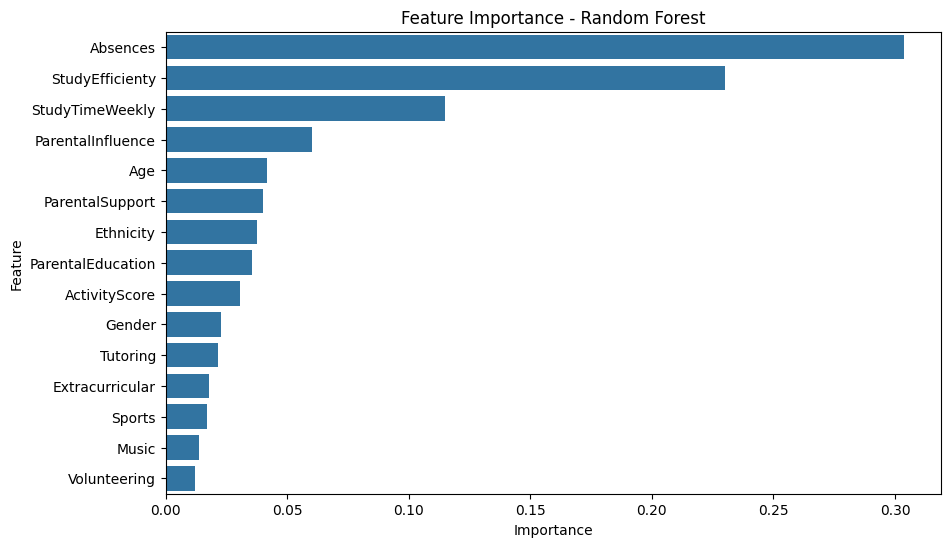

In [20]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.show()

### XGBoost

In [21]:
file_path = 'Student_performance_data .csv'
df = pd.read_csv(file_path)

# Set target and features
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing: scale numeric + encode categoricals
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)



c:\Users\kyles\anaconda3\envs\tf-env\lib\site-packages\xgboost\training.py:183: UserWarning: [15:30:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy on test set: 0.9164926931106472


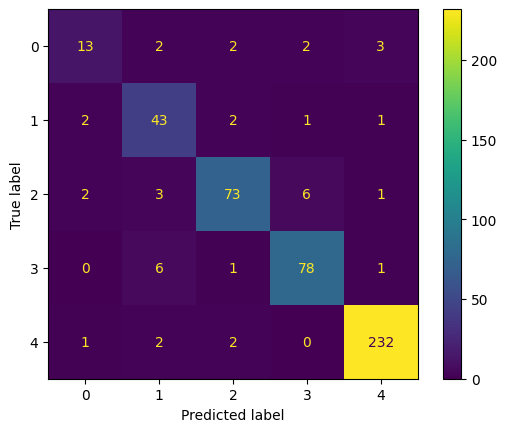

In [22]:


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Evaluation of Metrics-XGBoost 

- Accuracy Score
- Precision Score
- Recall Score
- F1-Score 


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.59      0.65        22
         1.0       0.77      0.88      0.82        49
         2.0       0.91      0.86      0.88        85
         3.0       0.90      0.91      0.90        86
         4.0       0.97      0.98      0.98       237

    accuracy                           0.92       479
   macro avg       0.85      0.84      0.85       479
weighted avg       0.92      0.92      0.92       479



# Deep Learning Using Featured Engineering

In [24]:
def calculate_derived_metrics(df):
    result_df = df.copy()
    
    result_df['StudySupport'] = result_df['StudyTimeWeekly'] + (result_df['Tutoring'] * 5)
    result_df['ParentalStudyInteraction'] = result_df['ParentalSupport'] * result_df['StudyTimeWeekly']
    result_df['EngagementScore'] = result_df[['Extracurricular', 'Sports', 'Music', 'Volunteering']].sum(axis=1)
    result_df['AttendanceRate'] = 1 - (result_df['Absences'] / result_df['Absences'].max())
    result_df['AcademicSupportScore'] = result_df['ParentalSupport'] + (result_df['Tutoring'] * 2)
    result_df['StudyEfficiency'] = result_df['GPA'] / (result_df['StudyTimeWeekly'] + 1e-3)
        
    return result_df

# Load the data
df = pd.read_csv("Student_performance_data .csv")
df = calculate_derived_metrics(df) 

# Features and target
X = df.drop(['GradeClass', 'StudentID'], axis=1)
y = df['GradeClass']

# Encode target labels (e.g. A, B, C → 0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# If it's multi-class, convert to one-hot
y_categorical = to_categorical(y_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [25]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')  # softmax for multiclass classification
])

c:\Users\kyles\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2978 - loss: 1.6123 - val_accuracy: 0.4752 - val_loss: 1.2262
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5309 - loss: 1.2012 - val_accuracy: 0.5065 - val_loss: 1.0993
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5553 - loss: 1.0985 - val_accuracy: 0.5770 - val_loss: 1.0455
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6210 - loss: 0.9823 - val_accuracy: 0.6188 - val_loss: 1.0105
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.9623 - val_accuracy: 0.6475 - val_loss: 0.9818
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6832 - loss: 0.9001 - val_accuracy: 0.6527 - val_loss: 0.9606
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6771 - loss: 0.8863 - val_accuracy: 0.6867 - val_loss: 0.9318
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6739 - loss: 0.8937 - val_accuracy: 0.6893 - val_loss:

### Evaluation metrics-Deep learning

- Accuracy Score
- Precision Score
- Recall Score
- F1-Score 

In [28]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Ensure that label_encoder.classes_ contains valid labels and convert to string
class_labels = [str(label) for label in label_encoder.classes_]

# Proceed with the classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7991 - loss: 0.6585 
Test Accuracy: 82.05%
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.24        22
         1.0       0.61      0.78      0.68        49
         2.0       0.76      0.75      0.76        85
         3.0       0.78      0.71      0.74        86
         4.0       0.90      0.96      0.93       237

    accuracy                           0.82       479
   macro avg       0.81      0.67      0.67       479
weighted avg       0.83      0.82      0.81       479

